In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
 
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
import tensorflow as tf
from sklearn.metrics import accuracy_score


In [2]:
def load_data():
    csv_path ="./train-set.csv"
    return pd.read_csv(csv_path)

In [3]:
pd.options.display.float_format = '{:,.0f}'.format

df = load_data() # "housing" is a pandas DataFrame object containing all the data
df.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6,Category 6,A


In [86]:
df['SpendingScore'].value_counts()

Low        4878
Average    1974
High       1216
Name: SpendingScore, dtype: int64

In [87]:
df['Category'].value_counts()

Category 6    5238
Category 4    1089
Category 3     822
Category 2     422
Category 7     203
Category 1     133
Category 5      85
Name: Category, dtype: int64

In [88]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [89]:
dictionary_SpendingScore=[{'col':'SpendingScore','mapping':{'Low':1,'Average':2,'High':3}}]
encoder=ce.OrdinalEncoder(cols='SpendingScore',mapping=dictionary_SpendingScore)

x_train_encoded =encoder.fit_transform(df)

dictionary_Category=[{'col':'Category','mapping':{'Category 1':1,'Category 2':2,'Category 3':3,'Category 4':4,'Category 5':5,'Category 6':6,'Category 7':7}}]
encoder=ce.OrdinalEncoder(cols='Category',mapping=dictionary_Category)

x_train_encoded =encoder.fit_transform(x_train_encoded)

dictionary_Segmentation=[{'col':'Segmentation','mapping':{'A':1,'B':2,'C':3,'D':4}}]
encoder=ce.OrdinalEncoder(cols='Category',mapping=dictionary_Segmentation)

x_train_encoded =encoder.fit_transform(x_train_encoded)

#coding the Category to number
x_train_encoded.Gender = pd.Categorical(x_train_encoded.Gender)
x_train_encoded['Gender'] = x_train_encoded.Gender.cat.codes

x_train_encoded.Married = pd.Categorical(x_train_encoded.Married)
x_train_encoded['Married'] = x_train_encoded.Married.cat.codes

x_train_encoded.Graduated = pd.Categorical(x_train_encoded.Graduated)
x_train_encoded['Graduated'] = x_train_encoded.Graduated.cat.codes

x_train_encoded.Profession = pd.Categorical(x_train_encoded.Profession)
x_train_encoded['Profession'] = x_train_encoded.Profession.cat.codes



x_train_encoded.head() 

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,1,0,22,0,5,1,1,4,4,4
1,462643,0,1,38,1,2,NaN,2,3,4,1
2,466315,0,1,67,1,2,1,1,1,6,2
3,461735,1,1,67,1,7,0,3,2,6,2
4,462669,0,1,40,1,3,NaN,3,6,6,1


In [90]:

x_train_encoded["WorkExperience"] = pd.to_numeric(x_train_encoded["WorkExperience"])


nan_value = float("NaN")
#x_train_encoded.replace(0, nan_value, inplace=True)
x_train_encoded.dropna(subset = ["FamilySize"], inplace=True)
x_train_encoded.dropna(subset = ["WorkExperience"], inplace=True)
 
x_train_encoded["WorkExperience"] = x_train_encoded["WorkExperience"].astype(int)

X=np.array(x_train_encoded[['SpendingScore']])

y=np.array(x_train_encoded['Segmentation'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train)
print(X_train.shape)
print(y)
print(y.shape)

[[2]
 [1]
 [2]
 ...
 [1]
 [1]
 [1]]
(4878, 1)
[4 2 2 ... 4 2 2]
(6969,)


In [91]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(2.7647515511076097, array([-0.1488641]))

In [92]:
y_predict=lin_reg.predict(X_test)
print(y_predict.shape)

(2091,)


In [93]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X, y, rcond=1e-6)
theta_best_svd

array([1.31045879])

In [94]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
print(theta_best)

[ 2.76475155 -0.1488641 ]


In [95]:
X_test.shape

(2091, 1)

In [96]:
y_predict

array([2.61588745, 2.46702334, 2.46702334, ..., 2.61588745, 2.61588745,
       2.61588745])

[2.61588745 2.46702334 2.46702334 ... 2.61588745 2.61588745 2.61588745]


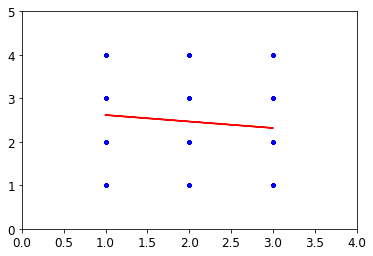

In [100]:
 
print(y_predict)
plt.plot(X_test,y_predict,"r-")
plt.plot(X_test,y_test,"b.")
plt.axis([0,4,0,5])
plt.show()

In [101]:
y_train=np.reshape(y_train, (y_train.shape[0],1))

In [102]:
y_test=np.reshape(y_test, (y_test.shape[0],1))

In [103]:
y_train

array([[1],
       [4],
       [3],
       ...,
       [2],
       [1],
       [1]])

In [110]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_train)
    plt.plot(X_train, y_train, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_test.dot(theta)  
            style = "b-" if iteration >= 0 else "r--"  
            plt.plot(X_test, y_predict, style) 
        gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train) 
        theta = theta - eta * gradients  
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 4, 0, 10])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

C:\Users\rashe\AppData\Local\Temp/ipykernel_19608/329276181.py:12: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


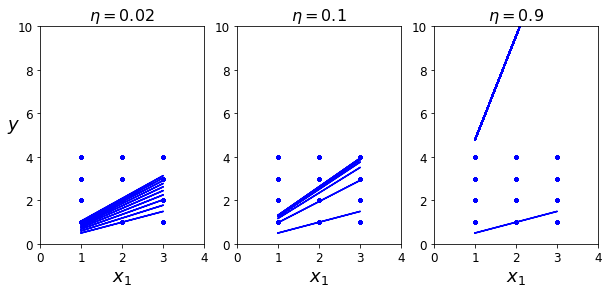

In [111]:
np.random.seed(42)
theta = np.random.randn(X_test.shape[1],1)  # random initialization
 
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.9)

plt.show()